# PSY 341K Text Analysis for Behavioral Data Science
##### Spring 2024; written by: Prof Desmond Ong (desmond.ong@utexas.edu)

## Assignment 2

In this assignment we'll be processing a dataset using an NLP pipeline to extract linguistic features (n-grams), and then using these features to predict an outcome of interest.

In Assignment 1, we walked you through each step of the 'research' process. In Assignment 2, we'll guide you through the high-level goals, but you'll have a bit more latitude to decide how to go about each step in the process. (You have all the "mechanics" in terms of the code required, from the Tutorials). This assignment will be more challenging because it is a bit more open-ended, and the idea is to gradually build you towards executing your research project, which is the other extreme where you decide everything (and it does get pretty overwhelming!).

In [1]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/ruthcarter/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [2]:
import numpy as np
from nltk.corpus import twitter_samples

The data we are using is a small sample of tweets that is packaged into `nltk.corpus`, and they are labelled as either "positive" or "negative".


### Your goal in this Assignment is to investigate what linguistic features predict a tweet being "Positive" or "Negative". 

In other words, you will calculate some linguistic features of interest, e.g., unigrams, bigrams, if you like, trigrams. You may also calculate other features, e.g., word count.

You will then use those features in a logistic regression (or other classification technique of your choosing) to predict the label of the tweets.

### Reading in the data

The data consists of 5,000 positive and 5,000 negative tweets.

In [3]:
positive_tweets = twitter_samples.strings('positive_tweets.json') 
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
# print out the first ten positive tweets, and the first ten negative tweets, to get a sense of the text.

# --- your code ---

print(positive_tweets[:10])

print(negative_tweets[:10])


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

#### Comment on your observations! What do you notice? Are there things that you have to take note of?

#### Your Written Answer here
- The positive tweets use a lot of smiley faces and exclamation marks. They also seem to interact with other users more often (@-ing other users). There are also abbreviations of words (like tmr for tomorrow or fb for facebook, or ETL for... something...) that we need to consider. Otherwise, we won't fully understand the meaning of the tweet. Also, since hashtags are usually one whole word, it will be difficult to analyze (like #FlipkartFashionFriday). Also, not many tweets in this dataset seem to use emojis, but it looks like it does occasionally happen. I think this means we should use the "from nltk.tokenize.casual import TweetTokenizer" instead of normally tokenizing the text. Additionally, since tweets are popular in many countries, we may need to account for different spellings of English words (like neighbour and neighbor). Interestingly, some of the positive tweets look like they come from businesses reaching out to customers, either in customer assistance or announcements. This makes sense since companies normally need to put on a positive and upbeat tone. This would be a different analysis than normal tweets since, again, companies are obviously going to maintain a neutral to positive tone in many of their tweets. 

### Calculating Features

Let's process the tweets! In class, we've covered a number of different preprocessing steps to calculate linguistic features. The choice of which steps to use (or not use) really depends on the specific context.

- For example, we talked about why stop words are removed, but also why it may be interesting to keep stop words.
- As another example, we talked about identifing Named Entities. But what do you do with them? You could decide to keep them in as features if you have specific hypotheses (e.g., if you're studying some political text, it might be handy to keep in the names of certain politicians). Or you might decide that actually names are irrelevant to your research question and remove them.

The key is to really take some time to understand your data, and especially as it pertains to your hypotheses. As in Assignment 1, please `print()` and read some of the examples to get a sense for the language used. Please also `print()` out your variables as you are calculating them. Then you might notice additional issues that you may need to correct. 

- A simple one that we didn't cover in class (because it's quite straightforward) is lower-case normalization: that is, converting all the text to lowercase, say using `.lower()`. This is so `A strawberry` and `a strawberry` will become the same bigram. BUT lower-casing will also make `American` into `american`. (Also, lower-casing will throw off the POS-taggers/NER identifiers, which are case sensitive).


#### Note: Creating a feature array

Note that after you preprocess and calculate your unigrams/n-grams, you need to convert the features into a large word-count array, with a corresponding "vocabulary". 

For example, we can take all the unigrams and arrange them alphabetically:

- ["American", "and", ...]

and if the first tweet is "this American is a proud American" (so 2 `American`s and 0 `and`s), and the second tweet is "and I am happy" (0 `American` and 1 `and`), then we need to create a feature array that looks like:

- [[2, 0, ...]
- [0, 1, ...]
- ... ]

such that the rows give the features for each tweet, while the columns give the word-count of each n-gram in the vocabulary. This `num_tweet` by `num_feature` array can then be used as the independent variables ("X") in the regression. 


## Please process the text and calculate unigram and bigram features for each tweet.

Please add as many code boxes as you need, and document your steps (e.g., with markdown chunks or with in-line comments).


In [29]:
#### Your code below

In [5]:
# import extra packages: 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer


In [6]:
#tokenize the tweets: 

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

#function to tokenize tweets + join together 
def tokenize_tweets(tweets):
    """Tokenize and join the tweets for vectorization."""
    return [" ".join(tokenizer.tokenize(tweet)) for tweet in tweets]

all_tweets = positive_tweets + negative_tweets #join pos + neg tweets 
tokenized_tweets = tokenize_tweets(all_tweets) #tokenize combined pos + neg tweets 



In [7]:
#use CountVectorizer to extract unigram and bigram features

vectorizer = CountVectorizer(ngram_range=(1, 2))

#fit and transform the tokenized tweets to get feature matrix
X = vectorizer.fit_transform(all_tweets).toarray()



### Creating a Train/Test set Split

Now that we're done calculating features and are ready to move onto making predictions, let's split up the examples into a training set and a test set, in order to avoid overfitting.

Please split up the data with **80% in the training set** and the remaining **20% in the test set**. 

In [8]:
# you can do a simple version (e.g., put the first 4000 
# positive examples into a training set)
# or you can also choose a random split.

# be sure to create labels too!
# Let's use 1 = pos, 0 = neg

# --- your code ---


#import package to split data 
from sklearn.model_selection import train_test_split



y = [1] * len(positive_tweets) + [0] * len(negative_tweets) #create labels for the tweets: Assign 1 for pos tweets and 0 for neg tweets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split data 80/20 



### Using the linguistic features to make predictions

Now that you have calculated the linguistic features for each tweet, and you have divided your data into a training set and a test set, let's take stock of the main variables you should have. (Note: *num_features* may differ depending on the choices you made to calculate your features.)

You should have:

- a 8000 x *num_features* array that contains the features for the 8000 tweets in the training set
- a 2000 x *num_features* array that contains the features for the 2000 tweets in the test set
- a 8000 x 1 array that contains the labels (pos/neg) for the 8000 tweets in the training set
- a 2000 x 1 array that contains the labels (pos/neg) for the 2000 tweets in the test set

- an array that contains information on what each of the features mean (i.e., for the unigram/bigram features, this refers to the "vocabulary". You'll need this to interpret the results.)


If you've made it thus far, great, you're almost there! The remaining bit of work is to (i) train a model on the training set, (ii) evaluate the classification accuracy on the test set, and (iii) evaluate the features that are predictive of the label (and discuss).

In [10]:
# (i) Train a model on the training set

# please set up and train a logistic regression model on the training set.
# if your number of features is much larger than the training set size, you may wish to consider using regularization


# NOTE if you are using statsmodel, this may take a while to train.
# sklearn does it much faster. 

# --- your code ---

#importing packages: 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)




In [11]:
# (ii) Evaluate the classification accuracy on the test set

# Using your model, make label predictions on the test set (by using the model on the test features).
# compare them against the actual test set labels.
# what is the classification accuracy of this model?

# --- your code ---

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.773


In [32]:
# (iii) Evaluate the features that are predictive of the label (and discuss).

# Take a look at the features that are most predictive of the label. 
# For example, which unigrams or bigrams were most predictive?
# do these make sense?

# --- your code, and written text response ---



# Optional: Identify the most predictive features
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]
top_features = sorted(zip(coef, feature_names), reverse=True)[:20]
bottom_features = sorted(zip(coef, feature_names))[:20]
print("Top predictive features:", top_features)
print("Bottom predictive features (top features for negative tweets):", bottom_features)

Top predictive features: [(2.6686766739622176, 'thanks'), (2.342824685357506, 'fback'), (2.037297731928487, 'happy'), (2.0327349483505275, 'nice'), (1.880514475504466, 'great'), (1.8032880686039128, 'cool'), (1.7626616342157482, 'goodnight'), (1.7490127276542458, 'welcome'), (1.4825333019490246, 'thank you'), (1.4687663912132878, 'glad'), (1.3896619076928984, 'ff'), (1.3472940255529289, 'enjoy'), (1.3295522985275186, 'awesome'), (1.3183170273965072, 'done'), (1.2823465612404772, 'hi'), (1.2434071281580208, 'morning'), (1.2332730160381098, 'hello'), (1.222248305933257, 'cheers'), (1.2102058268682043, 'follback'), (1.170502903918259, 'lovely')]
Bottom predictive features (top features for negative tweets): [(-2.808817769265496, 'miss'), (-2.389057234712522, 'sad'), (-2.1372031686576047, 'sorry'), (-1.787530192052829, 'want'), (-1.4892868883613064, 'missing'), (-1.4695450942816881, 'feel'), (-1.4667397982227761, 'isn'), (-1.4169217711808648, 'wish'), (-1.4089708429961496, 'tired'), (-1.40

After splitting the data and training the model, we see that the top predictive unigrams include "thanks", "fback", "happy", "nice", "great", "cool", and "goodnight". The top predictive bigrams include "thank you", "my bad", and "the time". Clearly, unigrams had a higher proportion of correlation to pos/neg tweets, as most of the top features are unigrams. 

To visualize our results, I created a wordcloud of the top predictive features of positive tweets. 

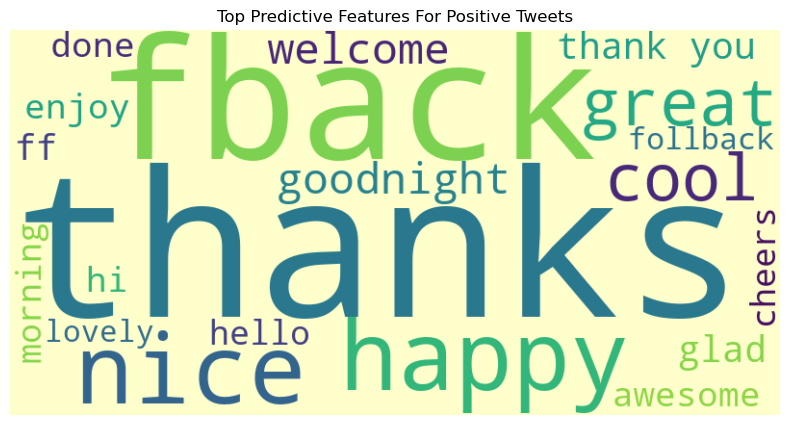

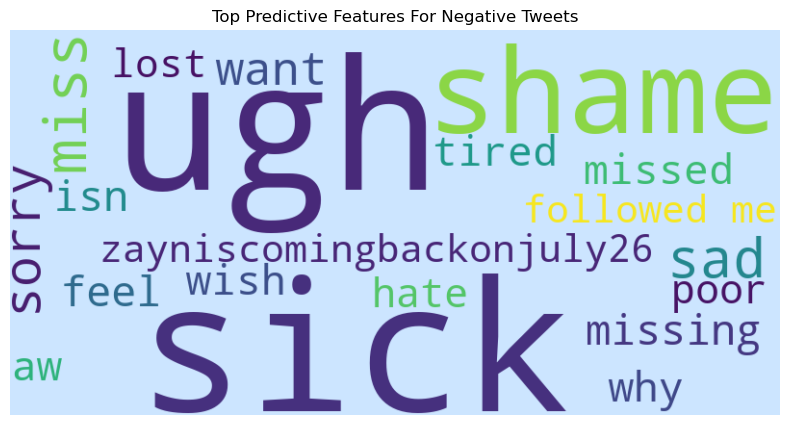

<Figure size 640x480 with 0 Axes>

In [62]:
#EXTRA: create visualization of top predictive features for pos/neg tweets

from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_coefficient_dict = {word: coefficient for coefficient, word in top_features}

# Create the WordCloud object for pos_tweets
wordcloud = WordCloud(width=800, height=400, background_color='#FFFFCC').generate_from_frequencies(word_coefficient_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Predictive Features For Positive Tweets')
plt.show()


word_coefficient_dict2 = {word: coefficient for coefficient, word in bottom_features}

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#CCE5FF').generate_from_frequencies(word_coefficient_dict2)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Predictive Features For Negative Tweets')
plt.show()

plt.tight_layout()